In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

In [2]:
data_dir="../data/"
df=pd.read_csv(data_dir+"GSE31568_normalized.txt", delimiter="\t", index_col=0)

In [3]:
df=df.transpose()

In [4]:
df_norm= 2*(df - df.min()) / (df.max()-df.min())-1
df_norm.drop(["hsa-miR-320a","hsa-miR-185","hsa-miR-103"],axis=1,inplace=True)

In [5]:
threshold = 0.3
df_norm=df_norm.drop(df_norm.std()[df_norm.std() < threshold].index.values, axis=1)

In [6]:
df_t=df_norm.iloc[:]

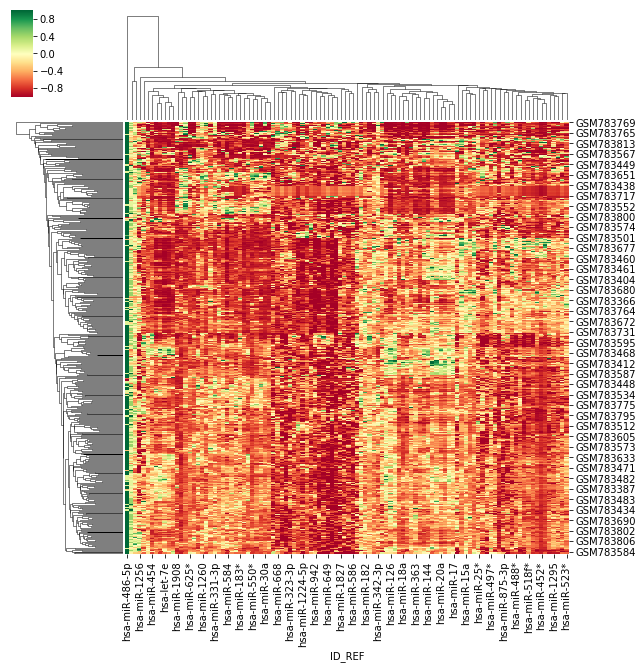

In [7]:
metrics=["correlation","euclidean","cosine"]
sns.clustermap(df_t,metric=metrics[1],cmap="RdYlGn")

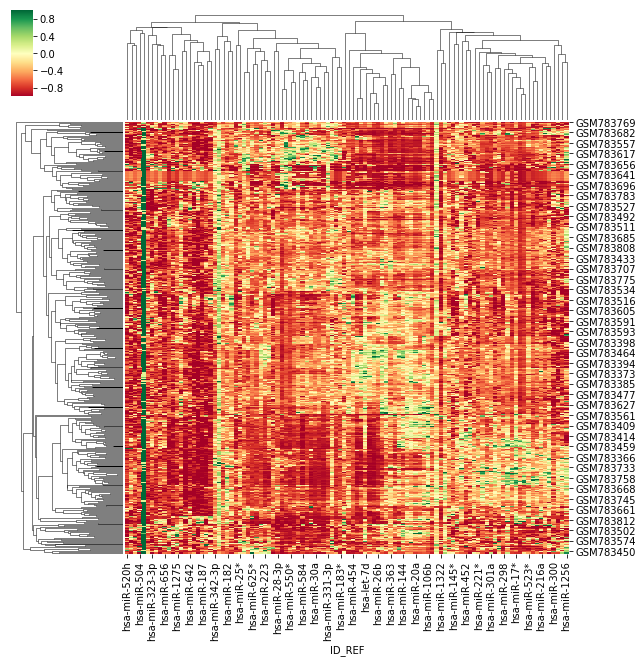

In [8]:
plot_dir="../plots/blood/"
sns.clustermap(df_t,metric=metrics[0],cmap="RdYlGn")
plt.savefig(plot_dir+"blood_med_3_corr.png")

C:\Users\Jonathan\Anaconda3\lib\site-packages\matplotlib\colorbar.py:218: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


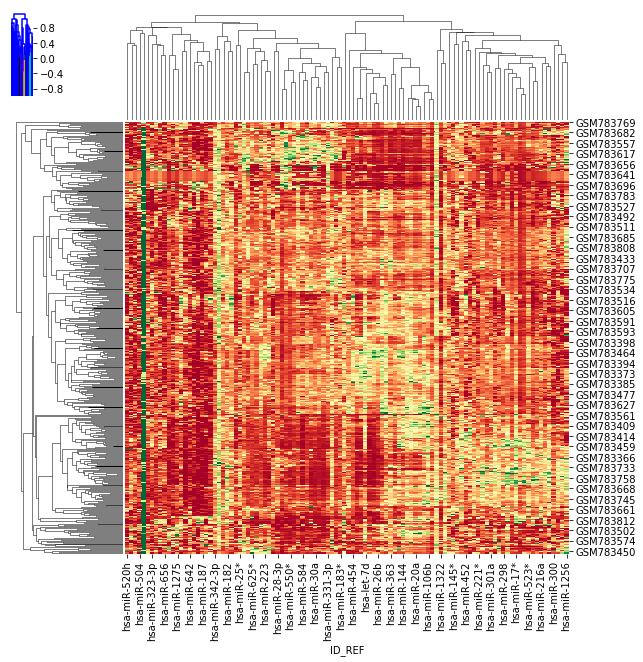

In [9]:
import scipy
#https://stackoverflow.com/questions/27924813/extracting-clusters-from-seaborn-clustermap/31167710
g = sns.clustermap(df_t,method='average', metric="correlation",cmap="RdYlGn")
den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_col.linkage,
                                         labels = df_t.index,
                                         color_threshold=0.60)  
from collections import defaultdict

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = {}
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

clusters = get_cluster_classes(den)

cluster = []
for i in df_t.index:
    included=False
    for j in clusters.keys():
        if i in clusters[j]:
            cluster.append(j)
            included=True
    if not included:
        cluster.append(None)

df_t["cluster"] = cluster

In [11]:
hcluster_labels=df_t["cluster"]

In [12]:
df_truth=pd.read_csv(data_dir+"GSE31568_truth_labels.txt", header=0,index_col=0)

In [91]:
merged=df_t.merge(df_truth, left_index=True, right_index=True)

In [92]:
df_t["cluster"]

GSM783365     None
GSM783366     None
GSM783367     None
GSM783368     None
GSM783369     None
GSM783370     None
GSM783371     None
GSM783372     None
GSM783373     None
GSM783374     None
GSM783375     None
GSM783376     None
GSM783377     None
GSM783378     None
GSM783379     None
GSM783380     None
GSM783381     None
GSM783382     None
GSM783383     None
GSM783384     None
GSM783385     None
GSM783386     None
GSM783387     None
GSM783388     None
GSM783389     None
GSM783390     None
GSM783391     None
GSM783392     None
GSM783393     None
GSM783394     None
              ... 
GSM783789        k
GSM783790        y
GSM783791        r
GSM783792        k
GSM783793        y
GSM783794        g
GSM783795        b
GSM783796        c
GSM783797        b
GSM783798        b
GSM783799        r
GSM783800        g
GSM783801        y
GSM783802        c
GSM783803        c
GSM783804        y
GSM783805        c
GSM783806        r
GSM783807        g
GSM783808        m
GSM783809        g
GSM783810   

In [93]:
print(df_t["cluster"][0]!=None)

False


In [94]:
df_n=merged.dropna()

In [95]:
df_n["cluster"]

GSM783713    y
GSM783714    b
GSM783715    g
GSM783716    c
GSM783717    b
GSM783718    g
GSM783719    c
GSM783720    y
GSM783721    r
GSM783722    g
GSM783723    b
GSM783724    y
GSM783725    c
GSM783726    b
GSM783727    b
GSM783728    b
GSM783729    b
GSM783730    b
GSM783731    b
GSM783732    b
GSM783733    b
GSM783734    b
GSM783735    r
GSM783736    b
GSM783737    g
GSM783738    r
GSM783739    g
GSM783740    c
GSM783741    c
GSM783742    b
            ..
GSM783789    k
GSM783790    y
GSM783791    r
GSM783792    k
GSM783793    y
GSM783794    g
GSM783795    b
GSM783796    c
GSM783797    b
GSM783798    b
GSM783799    r
GSM783800    g
GSM783801    y
GSM783802    c
GSM783803    c
GSM783804    y
GSM783805    c
GSM783806    r
GSM783807    g
GSM783808    m
GSM783809    g
GSM783810    b
GSM783811    g
GSM783812    c
GSM783813    b
GSM783814    b
GSM783815    m
GSM783816    b
GSM783817    b
GSM783818    c
Name: cluster, Length: 106, dtype: object

In [128]:
lbb=merged[merged["cluster"]=='b']
lbc=merged[merged["cluster"]=='c']
lby=merged[merged["cluster"]=='y']
lbg=merged[merged["cluster"]=='g']
lbr=merged[merged["cluster"]=='r']
lbm=merged[merged["cluster"]=='m']
lbk=merged[merged["cluster"]=='k']

In [129]:
c0=lbb["disease state"].value_counts()
print(c0)

copd                                    11
control                                  8
other pancreatic tumors and diseases     7
prostate cancer                          3
pankreatitis                             3
acure myocard infarction                 2
pancreatic cancer ductal                 2
wilms tumor                              1
ovarian cancer                           1
sarcoidosis                              1
lung cancer                              1
Name: disease state, dtype: int64


In [130]:
c1=lbc["disease state"].value_counts()
c2=lby["disease state"].value_counts()
c3=lbg["disease state"].value_counts()
c4=lbr["disease state"].value_counts()
c5=lbm["disease state"].value_counts()
c6=lbk["disease state"].value_counts()

In [131]:
truth

copd                                    24
control                                 20
other pancreatic tumors and diseases     9
pancreatic cancer ductal                 8
wilms tumor                              3
sarcoidosis                              2
lung cancer                              2
Name: disease state, dtype: int64

In [132]:
df_t.columns

Index(['hsa-miR-106b', 'hsa-miR-452', 'hsa-miR-145', 'hsa-miR-126',
       'hsa-miR-323-3p', 'hsa-miR-422a', 'hsa-miR-298', 'hsa-miR-106a',
       'hsa-miR-649', 'hsa-miR-500',
       ...
       'hsa-miR-598', 'hsa-miR-146a', 'hsa-miR-101', 'hsa-miR-22',
       'hsa-miR-25*', 'hsa-miR-1913', 'hsa-miR-942', 'hsa-miR-586',
       'hsa-miR-1280', 'cluster'],
      dtype='object', name='ID_REF', length=107)

In [133]:
truth=df_n["disease state"].value_counts()
c0.reindex(truth.index)
c1.reindex(truth.index)
c2.reindex(truth.index)
c3.reindex(truth.index)
c4.reindex(truth.index)
c5.reindex(truth.index)
c6.reindex(truth.index)

c0_=c0/truth
c1_=c1/truth
c2_=c2/truth
c3_=c3/truth
c4_=c4/truth
c5_=c5/truth
c6_=c6/truth

df_perc=pd.DataFrame()
df_perc["Cluster 0"]=c0_
df_perc["Cluster 1"]=c1_
df_perc["Cluster 2"]=c2_
df_perc["Cluster 3"]=c3_
df_perc["Cluster 4"]=c4_
df_perc["Cluster 5"]=c5_
df_perc["Cluster 6"]=c6_

In [134]:
df_perc.fillna(0, inplace=True)

In [135]:
df_perc

Cluster 0  Cluster 1  Cluster 2  \
acure myocard infarction               0.000000   0.000000   0.000000   
control                                0.400000   0.200000   0.100000   
copd                                   0.458333   0.125000   0.166667   
lung cancer                            0.500000   0.000000   0.000000   
other pancreatic tumors and diseases   0.777778   0.111111   0.000000   
ovarian cancer                         0.000000   0.000000   0.000000   
pancreatic cancer ductal               0.000000   0.000000   0.000000   
pankreatitis                           0.000000   0.000000   0.000000   
prostate cancer                        0.000000   0.000000   0.000000   
sarcoidosis                            0.000000   0.000000   0.000000   
wilms tumor                            0.000000   0.000000   0.000000   

                                      Cluster 3  Cluster 4  Cluster 5  \
acure myocard infarction               0.000000   0.000000   0.000000   
control                                0.100000   0.050000   0.150000   
copd                                   0.041667   0.083333   0.083333   
lung cancer                            0.000000   0.000000   0.000000   
other pancreatic tumors and diseases   0.000000   0.111111   0.000000   
ovarian cancer                         0.000000   0.000000   0.000000   
pancreatic cancer ductal               0.000000   0.000000   0.000000   
pankreatitis                           0.000000   0.000000   0.000000   
prostate cancer                        0.000000   0.000000   0.000000   
sarcoidosis                            0.000000   0.000000   0.000000   
wilms tumor                            0.000000   0.000000   0.000000   

                                      Cluster 6  
acure myocard infarction               0.000000  
control                                0.000000  
copd                                   0.041667  
lung cancer                            0.500000  
other pancreatic tumors and diseases   0.000000  
ovarian cancer                         0.000000  
pancreatic cancer ductal               0.000000  
pankreatitis                           0.000000  
prostate cancer                        0.000000  
sarcoidosis                            0.000000  
wilms tumor                            0.000000

In [136]:
df_n.columns

Index(['hsa-miR-106b', 'hsa-miR-452', 'hsa-miR-145', 'hsa-miR-126',
       'hsa-miR-323-3p', 'hsa-miR-422a', 'hsa-miR-298', 'hsa-miR-106a',
       'hsa-miR-649', 'hsa-miR-500',
       ...
       'hsa-miR-101', 'hsa-miR-22', 'hsa-miR-25*', 'hsa-miR-1913',
       'hsa-miR-942', 'hsa-miR-586', 'hsa-miR-1280', 'cluster',
       'disease state', 'random'],
      dtype='object', length=109)

In [137]:
temp=df_n.drop(["cluster","disease state","random"], axis=1)

In [138]:
df_perc.index

Index(['acure myocard infarction', 'control', 'copd', 'lung cancer',
       'other pancreatic tumors and diseases', 'ovarian cancer',
       'pancreatic cancer ductal', 'pankreatitis', 'prostate cancer',
       'sarcoidosis', 'wilms tumor'],
      dtype='object')

In [139]:
df_n.columns

Index(['hsa-miR-106b', 'hsa-miR-452', 'hsa-miR-145', 'hsa-miR-126',
       'hsa-miR-323-3p', 'hsa-miR-422a', 'hsa-miR-298', 'hsa-miR-106a',
       'hsa-miR-649', 'hsa-miR-500',
       ...
       'hsa-miR-101', 'hsa-miR-22', 'hsa-miR-25*', 'hsa-miR-1913',
       'hsa-miR-942', 'hsa-miR-586', 'hsa-miR-1280', 'cluster',
       'disease state', 'random'],
      dtype='object', length=109)

In [140]:
df_n=df_n[df_n['disease state'].isin(['control','copd','other pancreatic tumors and diseases'])]

In [141]:
temp=df_n.drop(['cluster','disease state', 'random'],axis=1)

In [142]:
temp

hsa-miR-106b  hsa-miR-452  hsa-miR-145  hsa-miR-126  \
GSM783715     -0.572884    -0.556971    -0.933192    -0.911124   
GSM783716     -0.321345    -0.496342    -0.924050    -0.640703   
GSM783717     -0.615433    -0.544658    -0.096403    -0.896054   
GSM783720     -0.321345    -0.808147    -0.710692    -0.552288   
GSM783723      0.152061    -0.657446    -0.977620    -0.663570   
GSM783726      0.152061    -0.710114    -0.942002    -0.567496   
GSM783728      0.028130    -0.695084    -0.819802    -0.255240   
GSM783729     -0.400094    -0.292548    -0.948216    -0.464955   
GSM783730     -0.218592    -0.830548    -0.883522    -0.287626   
GSM783731      0.616461    -0.722564    -0.916239    -0.640703   
GSM783732      0.337648    -0.760054    -0.976985    -0.630098   
GSM783733     -0.218592    -0.665067    -0.919942    -0.790202   
GSM783734      0.337648    -0.641121    -0.929697    -0.713328   
GSM783735      0.337648    -0.412447    -0.847323    -0.567496   
GSM783736      0.616461    -0.686847    -0.644190    -0.506550   
GSM783747     -0.076264    -0.770084    -0.994646    -0.911124   
GSM783748      0.152061    -0.930445    -0.977190    -0.580845   
GSM783749      0.028130    -0.313851    -0.988633    -0.785775   
GSM783753      0.028409    -0.613439    -0.908440    -0.767577   
GSM783756      0.028130    -0.634752    -0.944922    -0.867603   
GSM783757      0.152061    -0.480123    -0.954858    -0.807722   
GSM783759      0.028130    -0.355554    -0.954858    -0.619529   
GSM783761     -0.321345    -0.580959    -0.767251    -0.287626   
GSM783767     -0.276539    -0.796355    -0.333229     0.567112   
GSM783768      0.028130    -0.532091    -0.531931    -0.322149   
GSM783769      0.616461     0.367299    -0.226174    -0.973812   
GSM783770      0.152061    -0.803668    -0.809751    -0.069082   
GSM783778     -0.615433    -0.979599    -0.179629    -0.069082   
GSM783779     -0.651014    -0.294735     0.148197    -0.150733   
GSM783780     -0.114463    -1.000000    -0.321909    -0.150733   
GSM783781     -0.276539    -0.877267    -0.685483    -0.322149   
GSM783782     -0.684937    -0.904079    -0.188330    -0.476716   
GSM783783     -0.276539    -0.859839    -0.164091    -0.028314   
GSM783784     -0.584172    -1.000000    -0.425481    -0.069082   
GSM783787     -0.595460     0.102749    -0.803415    -0.287626   
GSM783788     -0.871838    -0.453927    -0.700642    -0.845189   
GSM783790     -0.498050     0.220567    -0.521169     0.113627   
GSM783791     -0.728520    -1.000000    -0.455770    -0.382195   
GSM783797     -0.524497    -0.836588    -0.881896    -0.048698   
GSM783798     -0.651014    -0.656596    -0.937389    -0.287626   
GSM783799     -0.814854    -0.475665    -0.401139    -0.607710   
GSM783802     -0.624465    -0.676710    -0.877989    -0.730089   
GSM783803     -0.524497    -0.862853    -0.740277    -0.496325   
GSM783804     -0.524497    -0.732425    -0.649778    -0.287626   
GSM783805     -0.218592    -0.421363    -0.682590    -0.255240   
GSM783806     -0.468400    -0.138768    -0.548807    -0.382195   
GSM783807     -0.498050    -0.157195    -0.447154    -0.382195   
GSM783808     -0.595460    -0.161271    -0.510597    -0.567496   
GSM783812      1.000000    -0.793595    -0.982172    -0.913686   
GSM783815     -0.360868    -0.903527    -0.255484     1.000000   
GSM783816     -0.360868    -0.668039    -0.531931     0.113627   
GSM783817      0.028130    -0.812393    -0.262441     0.349944   
GSM783818     -0.676134    -1.000000    -0.940104    -0.382195   

           hsa-miR-323-3p  hsa-miR-422a  hsa-miR-298  hsa-miR-106a  \
GSM783715       -0.597310     -0.429732    -0.869542     -0.786279   
GSM783716       -0.542202     -0.867705    -0.851689     -0.475981   
GSM783717       -0.586119     -0.202315    -0.865917     -0.867460   
GSM783720       -0.964101     -0.496065    -0.824467     -0.422862   
GSM783723       -0.778071     -0.738898    -0.177207     -0.287102   
GSM783726       -0.337398 

In [143]:
from sklearn.metrics import calinski_harabaz_score
from sklearn.metrics import silhouette_score
print(calinski_harabaz_score(temp, df_n["cluster"]))
print(silhouette_score(temp,df_n["cluster"]))

1.0455627624638075
-0.16998415523455515


In [63]:
corr=df_norm.corr()

In [64]:
sums=corr.sum(axis=1)

In [21]:
idx=np.argsort(-sums)

(array([ 14.,  44.,  63.,  78., 114., 143., 118., 130., 113.,  43.]),
 array([-54.87933113, -42.07425432, -29.26917751, -16.4641007 ,
         -3.6590239 ,   9.14605291,  21.95112972,  34.75620653,
         47.56128333,  60.36636014,  73.17143695]),
 <a list of 10 Patch objects>)

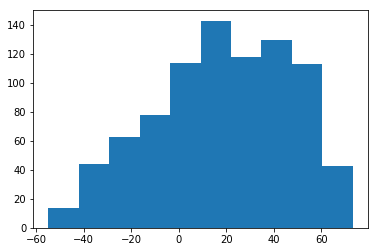

In [22]:
plt.hist(sums[idx])

In [29]:
idx2=idx[:5]
idx2.append(idx[:-5])

ID_REF
hsa-miR-579        833
hsa-miR-663b       255
hsa-miR-106b       445
hsa-miR-449b       393
hsa-miR-561        405
hsa-miR-579        833
hsa-miR-663b       255
hsa-miR-106b       445
hsa-miR-449b       393
hsa-miR-561        405
hsa-miR-524-3p     574
hsa-miR-655        664
hsa-miR-30c-2*     345
hsa-miR-299-5p     246
hsa-miR-369-5p     124
hsa-miR-452        435
hsa-miR-934        505
hsa-miR-483-5p     529
hsa-miR-340*        87
hsa-miR-340        481
hsa-miR-608        176
hsa-miR-1539       382
hsa-miR-802        377
hsa-miR-654-3p     214
hsa-miR-507        541
hsa-miR-637        416
hsa-miR-1228       274
hsa-miR-626        855
hsa-miR-151-5p     205
hsa-miR-431*       169
                  ... 
hsa-miR-532-3p     554
hsa-miR-33b         76
hsa-miR-942         55
hsa-miR-139-3p     118
hsa-miR-766        839
hsa-miR-21*        504
hsa-miR-492        145
hsa-miR-1208       595
hsa-miR-519e       129
hsa-miR-652        565
hsa-miR-425*        61
hsa-miR-1276       386
hsa-

In [30]:
list(sums[idx2].index)

['hsa-miR-519e',
 'hsa-miR-520c-3p',
 'hsa-miR-617',
 'hsa-miR-219-2-3p',
 'hsa-miR-125a-3p']

In [31]:
df=df_norm[list(sums[idx2].index)]

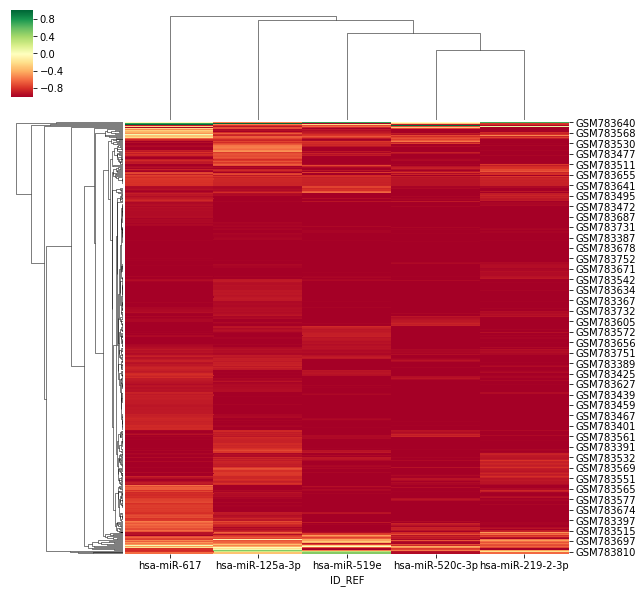

In [32]:
sns.clustermap(df,cmap="RdYlGn")

8


(0, 15)

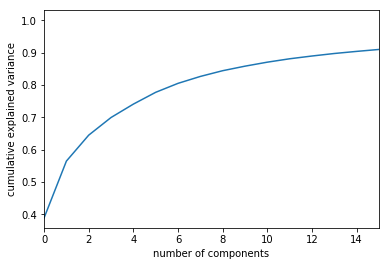

In [94]:
n=len(corr.columns)
def find_ncomponents(arr, val=0.9, n=n):
    diffs=np.abs(arr-val)
    closest=diffs.argmin()
    
    return np.arange(n)[closest]
pca = PCA().fit(corr)
arr=np.cumsum(pca.explained_variance_ratio_)

best_n=find_ncomponents(arr,0.85,n)
print(best_n)
plt.plot(arr)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,15)


In [82]:
pca_best = PCA(n_components=best_n)
X = pca_best.fit(corr).transform(corr)

In [83]:
df_x=pd.DataFrame(X, index=corr.index)

In [84]:
def spectral_cluster(df, label):
    n_samples=df.shape[0]
    clusterer=SpectralClustering(n_clusters=8,eigen_solver='arpack',affinity='nearest_neighbors')
    clusterer.fit(df)
    labels= clusterer.labels_
    W = clusterer.affinity_matrix_
    G=nx.from_scipy_sparse_matrix(W)
       
    d=np.reshape(np.array(W.sum(axis=0)),n_samples)
    D=np.diag(d)
    L=D-W
    lmbda, U = np.linalg.eigh(L)
    num=10
    lmbds=lmbda[:num]
    diffs=[]
    i_s=[]
    for i in range(num-1):
        diffs.append(lmbds[i+1]-lmbds[i])
        i_s.append(i+1)
    print(diffs)    
    print(np.argsort(diffs)[::-1] )
    plt.scatter(i_s,diffs)
    plt.xlabel("k clusters")
    plt.ylabel("Difference in Eigenvalues")
    #plt.savefig(plot_dir+"Spectral Eigenvalue Difference"+label+".png")
    plt.show()
    plt.scatter(np.arange(10),lmbds)
    plt.xlabel("k clusters")
    plt.ylabel("Eigenvalue")
    #plt.savefig(plot_dir+"Spectral Eigenvalue"+label+".png") 
    plt.show()
    
    return labels, clusterer

In [85]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans
import hdbscan as hd
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
import networkx as nx

[0.09825337931311279, 0.08135943481088474, 0.1332663465525108, 0.06874989465448289, 0.10713344600139801, 0.12747737533798648, 0.08630483387164511, 0.0537035629088255, 0.042140026604466696]
[2 5 4 0 6 1 3 7 8]


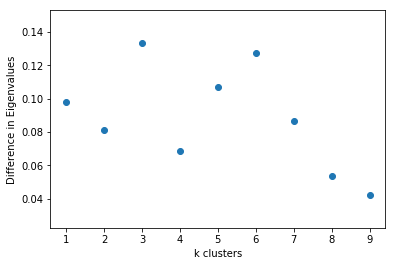

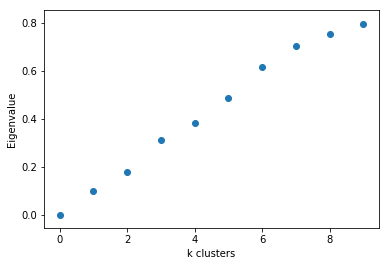

In [86]:
spectral_labels, spectral_gen=spectral_cluster(df_x, "normed")

In [87]:
spectral_gen_med=SpectralClustering(n_clusters=3,eigen_solver='arpack',affinity='nearest_neighbors')
spectral_gen_med.fit(df_x)
spectral_labels_med= spectral_gen_med.labels_

In [88]:
df2=df_x
df2["Spectral Label"]=spectral_labels_med

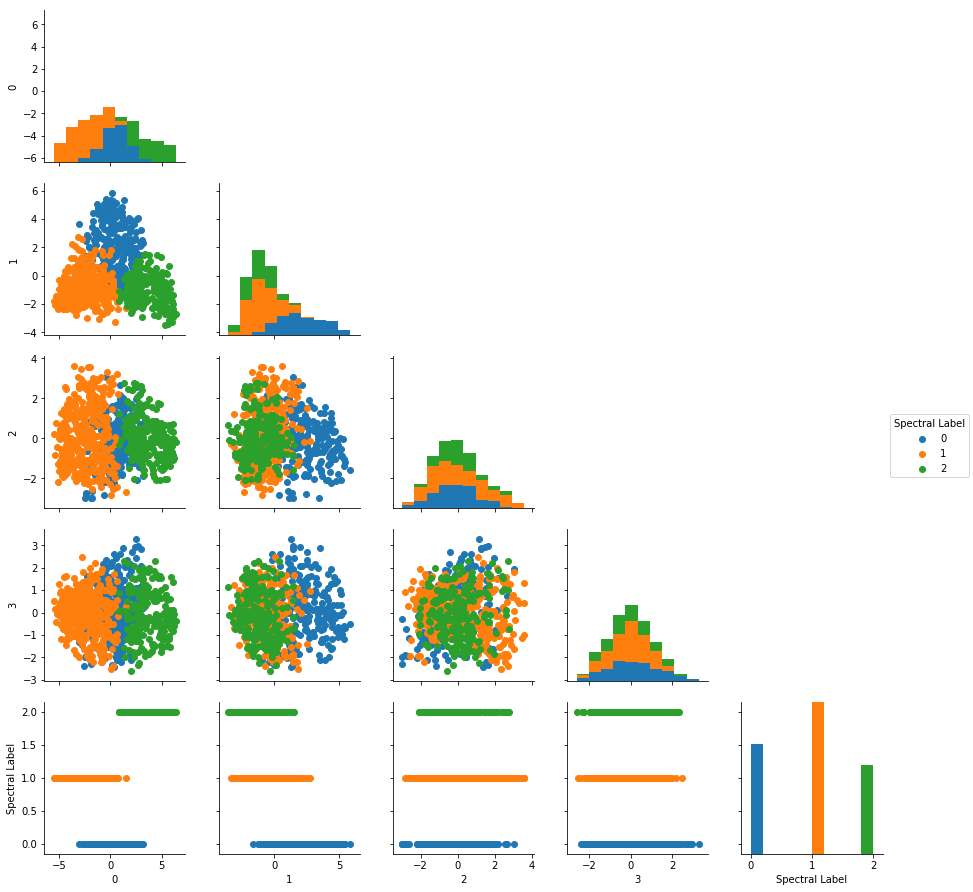

In [89]:
g = sns.PairGrid(df2, hue="Spectral Label")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False) 

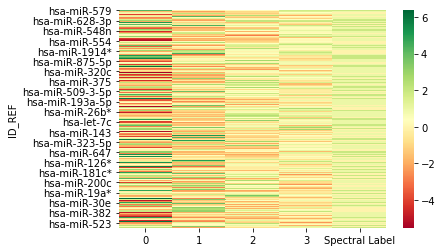

In [90]:
sns.heatmap(df_x,cmap="RdYlGn")

In [53]:
df_truth=pd.read_csv(data_dir+"GSE31568_truth_labels.txt", header=0,index_col=0)

In [54]:
merged=df2.merge(df_truth, left_index=True, right_index=True)

In [55]:
lb0=merged[merged["Spectral Label"]==0]
lb1=merged[merged["Spectral Label"]==1]
lb2=merged[merged["Spectral Label"]==2]
lb3=merged[merged["Spectral Label"]==3]

In [56]:
merged.columns

Index([               0,                1,                2,                3,
                      4,                5,                6,                7,
                      8,                9,               10,               11,
                     12, 'Spectral Label',  'disease state',         'random'],
      dtype='object')

In [58]:
c0=lb0["disease state"].value_counts()

In [59]:
c1=lb1["disease state"].value_counts()

In [60]:
c2=lb2["disease state"].value_counts()

In [61]:
c3=lb3["disease state"].value_counts()

In [62]:
truth=df_truth["disease state"].value_counts()

In [63]:
c0.index

Index([], dtype='object')

In [64]:
c0.reindex(truth.index)
c1.reindex(truth.index)
c2.reindex(truth.index)
c3.reindex(truth.index)

control                                NaN
other pancreatic tumors and diseases   NaN
pancreatic cancer ductal               NaN
sarcoidosis                            NaN
pankreatitis                           NaN
melanoma                               NaN
lung cancer                            NaN
copd                                   NaN
prostate cancer                        NaN
multiple sclerosis                     NaN
acure myocard infarction               NaN
periodontitis                          NaN
ovarian cancer                         NaN
tumor of stomach                       NaN
wilms tumor                            NaN
Name: disease state, dtype: float64

In [65]:
c0_=c0/truth
c1_=c1/truth
c2_=c2/truth
c3_=c3/truth

In [99]:
df_perc=pd.DataFrame()

In [100]:
df_perc["Cluster 0"]=c0_
df_perc["Cluster 1"]=c1_
df_perc["Cluster 2"]=c2_
df_perc["Cluster 3"]=c3_

In [101]:
df_perc

Cluster 0  Cluster 1  Cluster 2  \
acure myocard infarction               0.750000        NaN   0.250000   
control                                0.185714   0.171429   0.471429   
copd                                   0.375000   0.041667   0.458333   
lung cancer                            0.125000        NaN   0.406250   
melanoma                               0.428571   0.057143   0.142857   
multiple sclerosis                     0.434783        NaN   0.173913   
other pancreatic tumors and diseases   0.375000        NaN   0.270833   
ovarian cancer                         0.133333        NaN   0.600000   
pancreatic cancer ductal               0.377778        NaN   0.311111   
pankreatitis                           0.421053        NaN   0.289474   
periodontitis                          0.055556   0.111111   0.833333   
prostate cancer                        0.217391   0.130435   0.260870   
sarcoidosis                            0.044444   0.777778   0.155556   
tumor of stomach                       0.384615        NaN   0.615385   
wilms tumor                                 NaN        NaN   0.600000   

                                      Cluster 3  
acure myocard infarction                    NaN  
control                                0.171429  
copd                                   0.125000  
lung cancer                            0.437500  
melanoma                               0.371429  
multiple sclerosis                     0.391304  
other pancreatic tumors and diseases   0.354167  
ovarian cancer                         0.266667  
pancreatic cancer ductal               0.311111  
pankreatitis                           0.289474  
periodontitis                               NaN  
prostate cancer                        0.391304  
sarcoidosis                            0.022222  
tumor of stomach                            NaN  
wilms tumor                            0.400000

In [102]:
truth

control                                 70
other pancreatic tumors and diseases    48
sarcoidosis                             45
pancreatic cancer ductal                45
pankreatitis                            38
melanoma                                35
lung cancer                             32
copd                                    24
prostate cancer                         23
multiple sclerosis                      23
acure myocard infarction                20
periodontitis                           18
ovarian cancer                          15
tumor of stomach                        13
wilms tumor                              5
Name: disease state, dtype: int64